In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from matplotlib import rcParams



rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['lines.linewidth'] = 2.5

In [13]:
df = pd.read_csv('data/GOOGL.csv')
df.head()

,Date,Close
0,4/27/2020,1270.859985
1,4/28/2020,1232.589966
2,4/29/2020,1342.180054
3,4/30/2020,1346.699951
4,5/1/2020,1317.319946


In [14]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])


# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

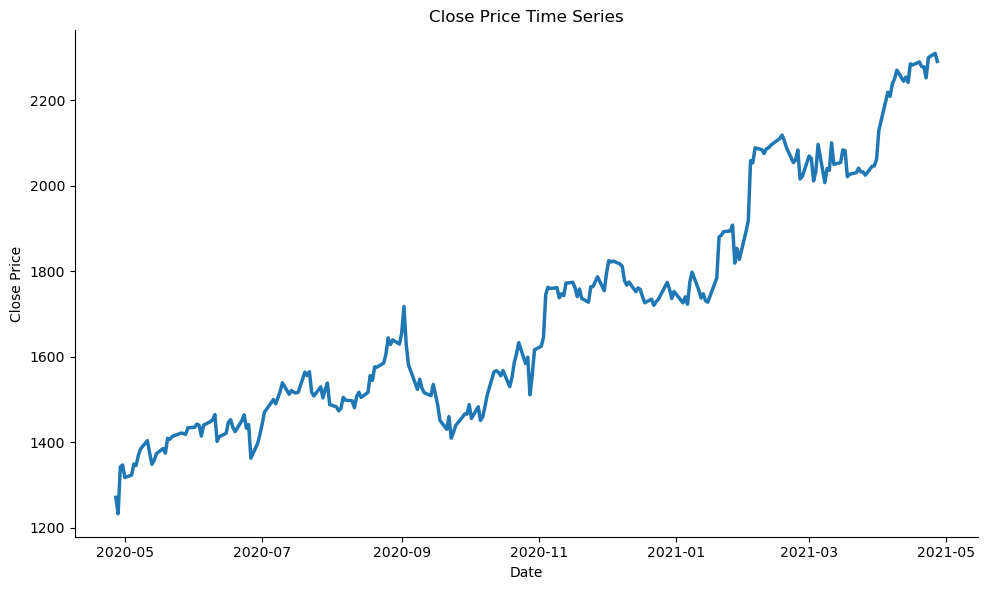

In [15]:

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'])
plt.title('Close Price Time Series')
plt.xlabel('Date')
plt.ylabel('Close Price')
# plt.grid(True)
# # plt.xticks(rotation=45)
# # Format x-axis to show month names
# plt.xticks(df_close.index, df_close.index.strftime('%B %Y'), rotation=45)

plt.tight_layout()
plt.show()

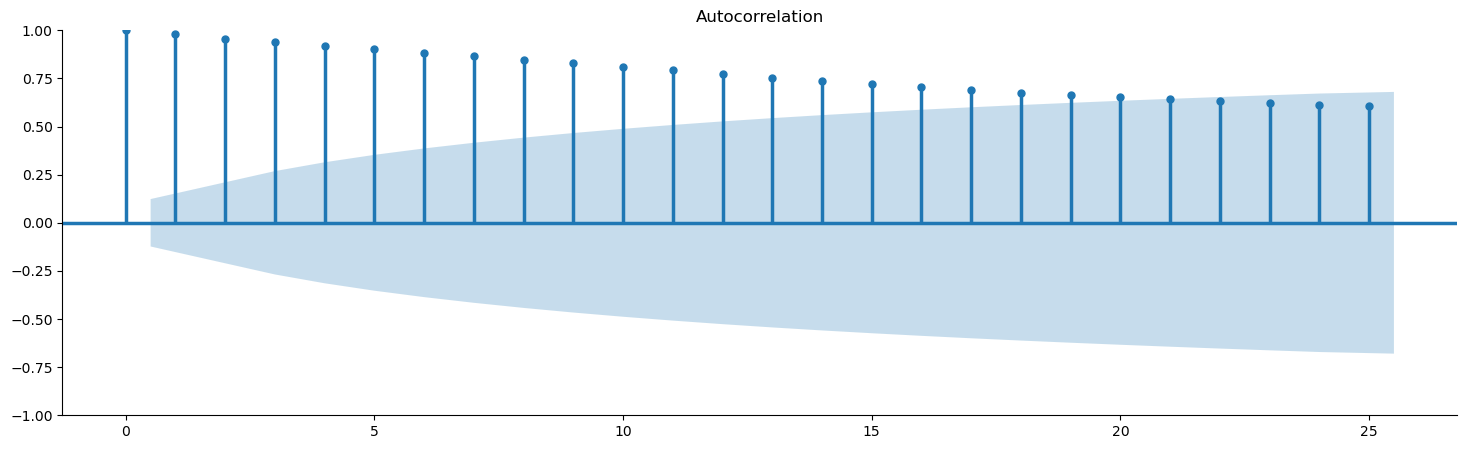

In [16]:
plot_acf(df['Close'])
plt.show()

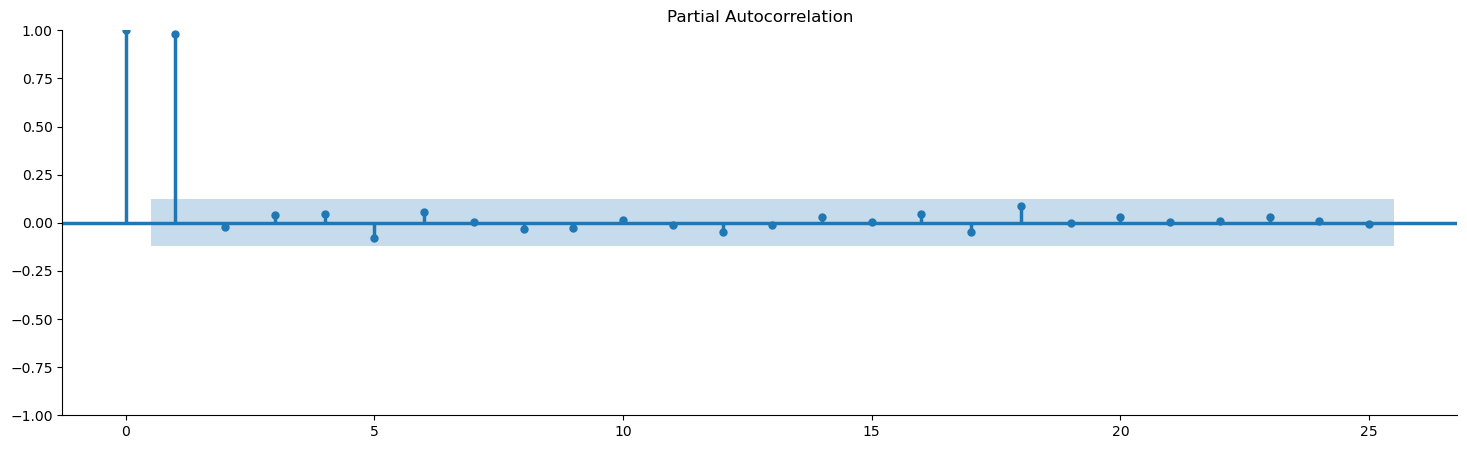

In [17]:
plot_pacf(df['Close'])
plt.show()


In [19]:
df=df.copy()


In [32]:
# diff_1_close=df['Close']-df['Close'].shift(1)
diff_1_close=df['Close'].diff().dropna()

In [25]:
diff_1_close.head()

Date
2020-04-28    -38.270019
2020-04-29    109.590088
2020-04-30      4.519897
2020-05-01    -29.380005
2020-05-04      5.580078
Name: Close, dtype: float64

<Axes: xlabel='Date'>

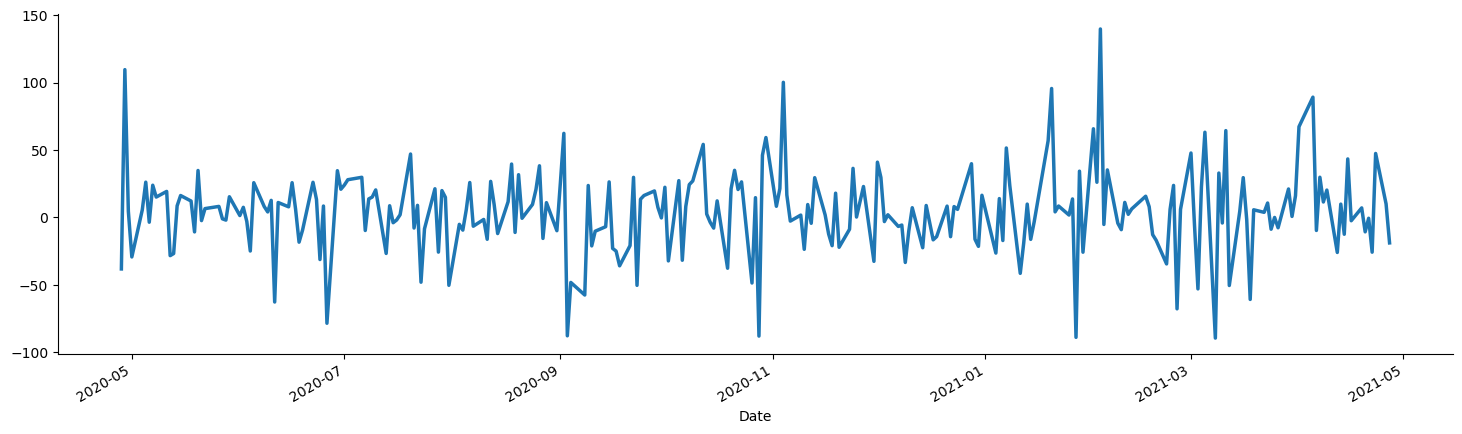

In [26]:
diff_1_close.plot()

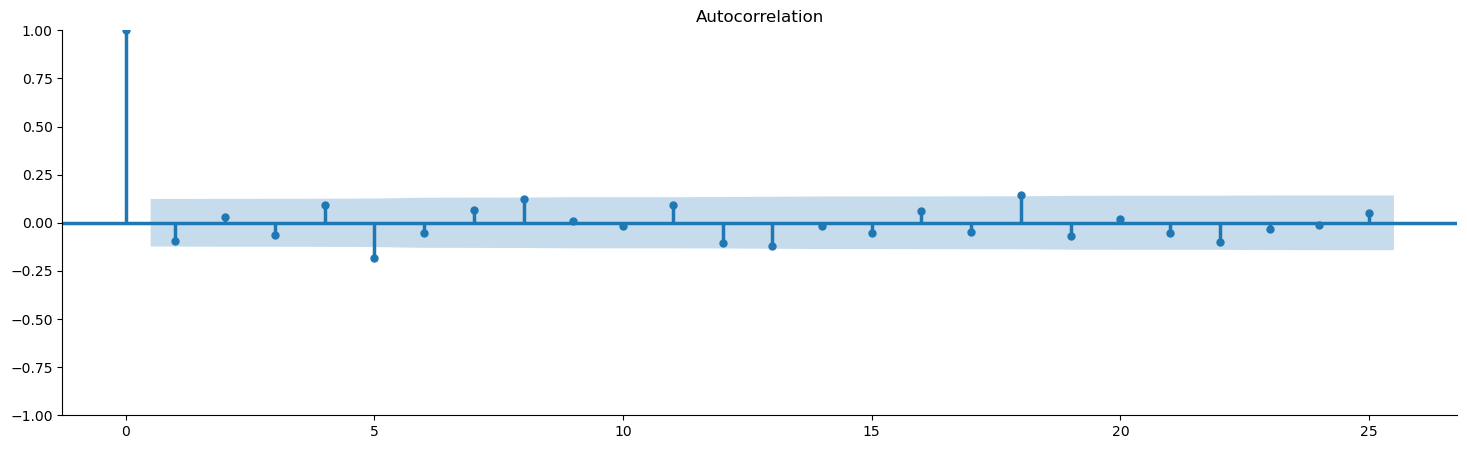

In [28]:
plot_acf(diff_1_close)
plt.show()

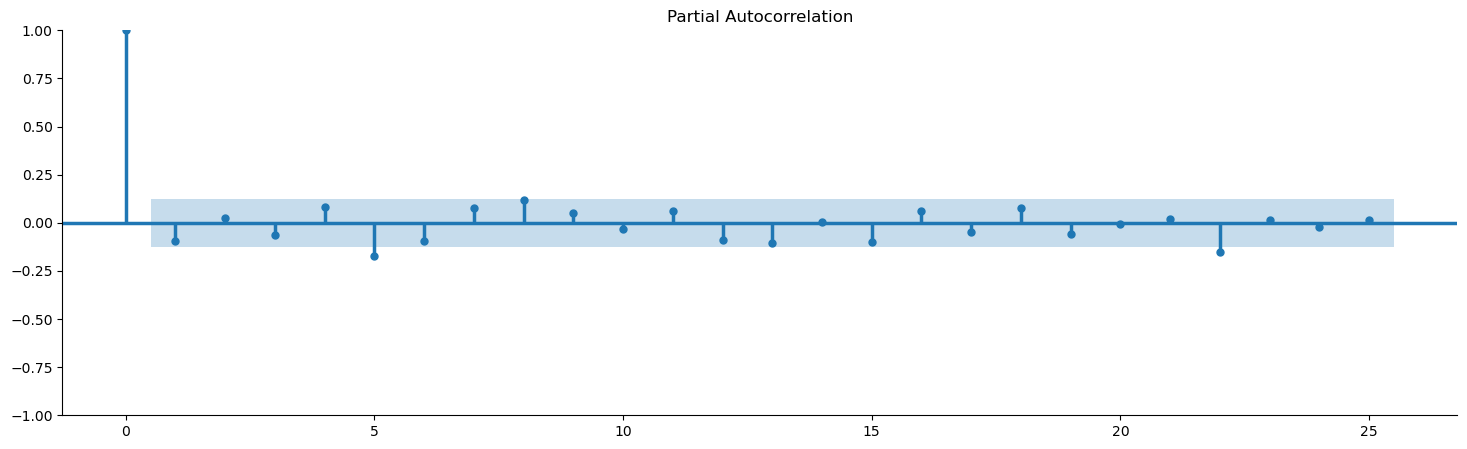

In [35]:
plot_pacf(diff_1_close)
plt.show()

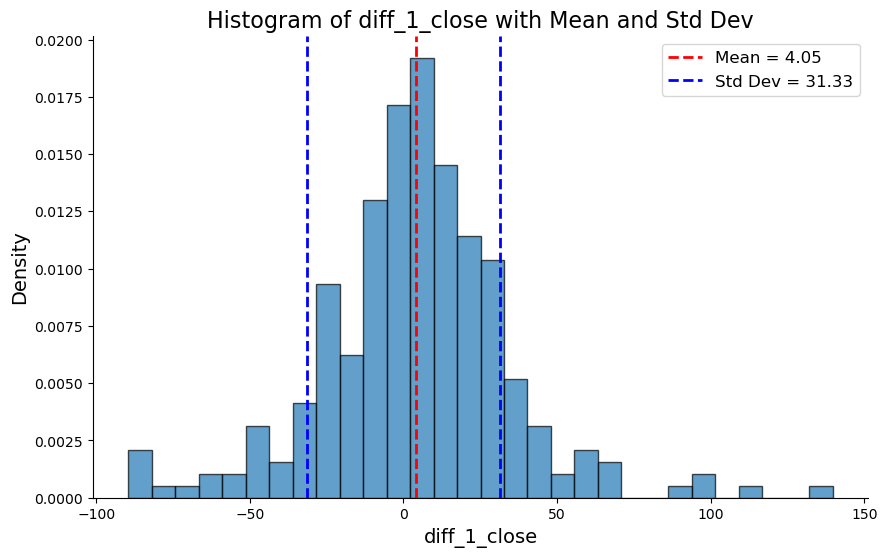

In [36]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(diff_1_close, bins=30, edgecolor='k', alpha=0.7, density=True)
plt.axvline(diff_1_close.mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean = {diff_1_close.mean():.2f}")
plt.axvline(diff_1_close.std(), color='blue', linestyle='dashed', linewidth=2, label=f"Std Dev = {diff_1_close.std():.2f}")
plt.axvline(-diff_1_close.std(), color='blue', linestyle='dashed', linewidth=2)

plt.title("Histogram of diff_1_close with Mean and Std Dev", fontsize=16)
plt.xlabel("diff_1_close", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)
plt.show()